In [80]:
import numpy as np
import pandas as pd

In [81]:
import os 
os.chdir("D:")

In [82]:
data = pd.read_csv("pro.csv")

In [83]:
data

,PRN,MARKS
0,2014111082,16
1,2014111083,0
2,2014111084,11
3,2014111085,14
4,2014111086,10
...,...,...
59,2014111767,17
60,2014111768,13
61,2014111769,11
62,2014111770,11


In [84]:
data["PRN"] = data["PRN"].astype(str)
print(data.dtypes)

PRN      object
MARKS     int64
dtype: object


In [88]:
import seaborn as sns

C:\Users\hp\anaconda\envs\py3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MARKS', ylabel='Density'>

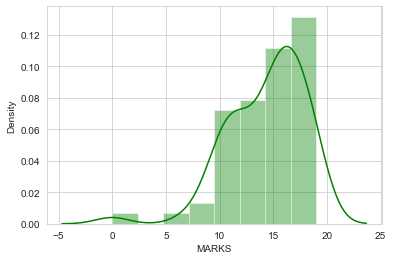

In [89]:
sns.set_style('whitegrid')
sns.distplot(data['MARKS'], kde = True, color ='green')

In [90]:
from sklearn.cluster import KMeans

In [91]:
x = data['MARKS']

In [92]:
x

0     16
1      0
2     11
3     14
4     10
      ..
59    17
60    13
61    11
62    11
63    15
Name: MARKS, Length: 64, dtype: int64

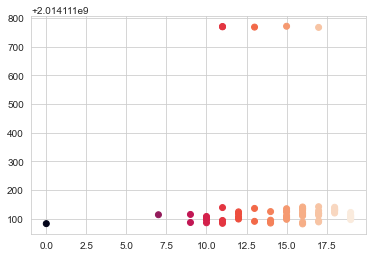

In [93]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data) 
    wcss.append(kmeans.inertia_)

<AxesSubplot:>

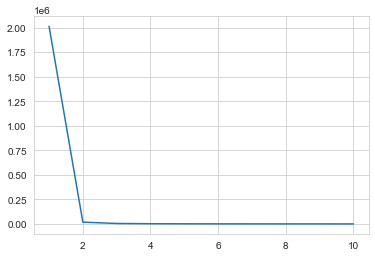

In [102]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = k, y = wcss)

In [103]:
kmeans = KMeans(2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [104]:
identified_clusters = kmeans.fit_predict(data)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

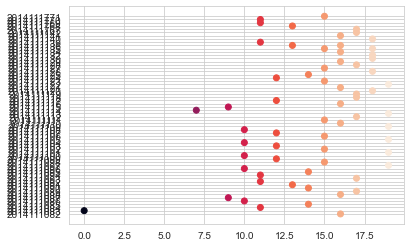

In [105]:
import matplotlib.pyplot as plt
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters["MARKS"],data_with_clusters['PRN'],c=data_with_clusters['MARKS'])

In [106]:
data["cluster"] = identified_clusters

In [107]:
data

,PRN,MARKS,cluster
0,2014111082,16,0
1,2014111083,0,0
2,2014111084,11,0
3,2014111085,14,0
4,2014111086,10,0
...,...,...,...
59,2014111767,17,1
60,2014111768,13,1
61,2014111769,11,1
62,2014111770,11,1


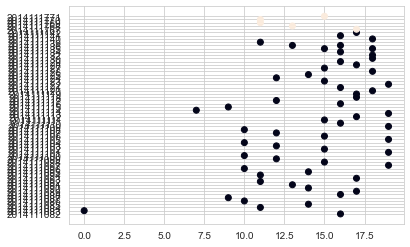

In [108]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters["MARKS"],data_with_clusters['PRN'],c=data['cluster'])